#**EDA - 1**

#**About - Dataset :**

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

#**Title : Bike Details Dataset**

**Source :**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


**Description :**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.

#**Title : Bike Details Dataset**

- **=name:** Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").

- **selling_price:** Listed selling price in INR (Numeric, e.g., 175000, 45000).

- **year:** Manufacturing year of the bike (Numeric, e.g., 2019, 2015).

- **seller_type:** Seller category, either "Individual" or "Dealer" (Categorical).

- **owner:** Ownership history, e.g., "1st owner", "2nd owner" (Categorical).

- **km_driven:** Total kilometers driven (Numeric, in km, e.g., 12000, 23000).

- **ex_showroom_price:** Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

#**Questions :**

In [1]:
# Load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

**1. What is the range of selling prices in the dataset ?**


In [2]:
selling_range = df['selling_price'].max() - df['selling_price'].min()
print(f"Range of selling prices: {selling_range}")

Range of selling prices: 755000


**2. What is the median selling price for bikes in the dataset ?**

In [3]:
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")

Median selling price: 45000.0


**3. What is the most common seller type ?**

In [4]:
most_common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller}")

Most common seller type: Individual


**4. How many bikes have driven more than 50,000 kilometers ?**

In [5]:
high_km_bikes = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {high_km_bikes}")

Bikes driven more than 50,000 km: 170


**5. What is the average km_driven value for each ownership type ?**

In [6]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**6. What proportion of bikes are from the year 2015 or older ?**

In [7]:
old_bikes_ratio = (df[df['year'] <= 2015].shape[0]) / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {old_bikes_ratio:.2%}")

Proportion of bikes from 2015 or older: 56.64%


**7. What is the trend of missing values across the dataset ?**

In [8]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


**8. What is the highest ex_showroom_price recorded, and for which bike ?**

In [9]:
highest_price_row = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print(highest_price_row[['name', 'ex_showroom_price']])

                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


**9. What is the total number of bikes listed by each seller type ?**

In [10]:
bike_counts_by_seller = df['seller_type'].value_counts()
print(bike_counts_by_seller)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**10. What is the relationship between selling_price and km_driven for first-owner bikes ?**

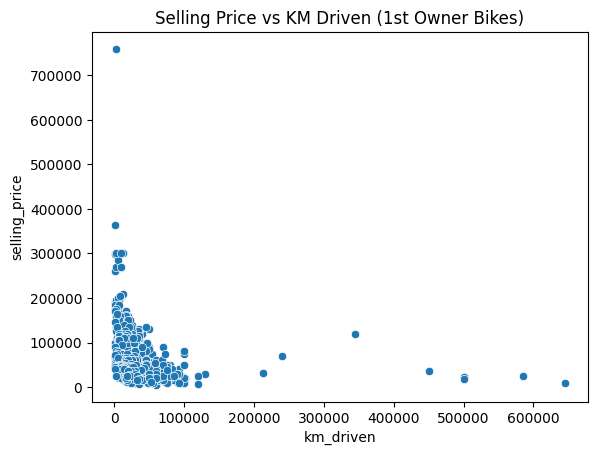

In [11]:
first_owner_bikes = df[df['owner'].str.lower().str.contains("1st")]
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")
plt.show()

**11.  Identify and remove outliers in the km_driven column using the IQR method.**

In [12]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
print(f"Original: {df.shape[0]} rows, After removing outliers: {filtered_df.shape[0]} rows")

Original: 1061 rows, After removing outliers: 1022 rows


**12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

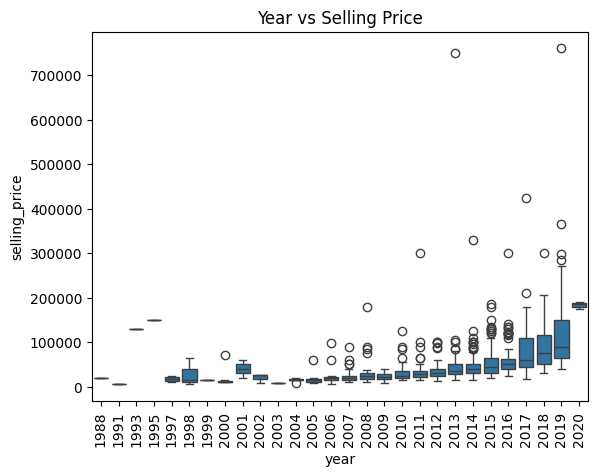

In [13]:
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.show()

**13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?**

In [14]:
df['bike_age'] = 2025 - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean().sort_index()
print(avg_depreciation)

bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


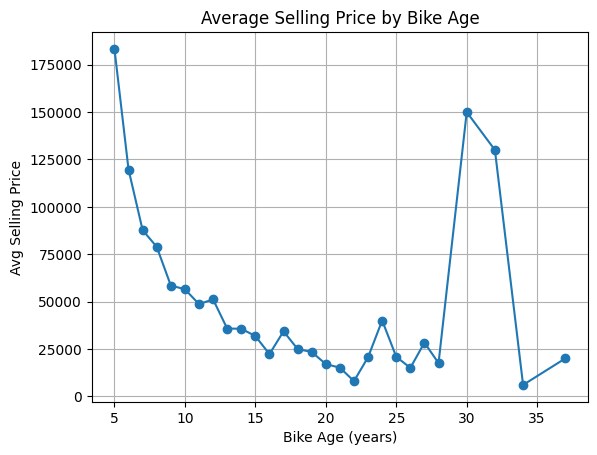

In [15]:
avg_depreciation.plot(kind='line', marker='o')
plt.title("Average Selling Price by Bike Age")
plt.xlabel("Bike Age (years)")
plt.ylabel("Avg Selling Price")
plt.grid(True)
plt.show()

**14.  Which bike names are priced significantly above the average price for their manufacturing year ?**

In [16]:
year_avg = df.groupby('year')['selling_price'].mean().reset_index()
df = df.merge(year_avg, on='year', suffixes=('', '_year_avg'))

# Filter: price > 1.5x average
premium_bikes = df[df['selling_price'] > 1.5 * df['selling_price_year_avg']]
print(premium_bikes[['name', 'year', 'selling_price', 'selling_price_year_avg']])

                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     selling_price_year_avg  
2              87660.374046  
7              34289.285714  
13            119689.511628  
18             87660.374046  
23            119689.511628  
..                      ...

**15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

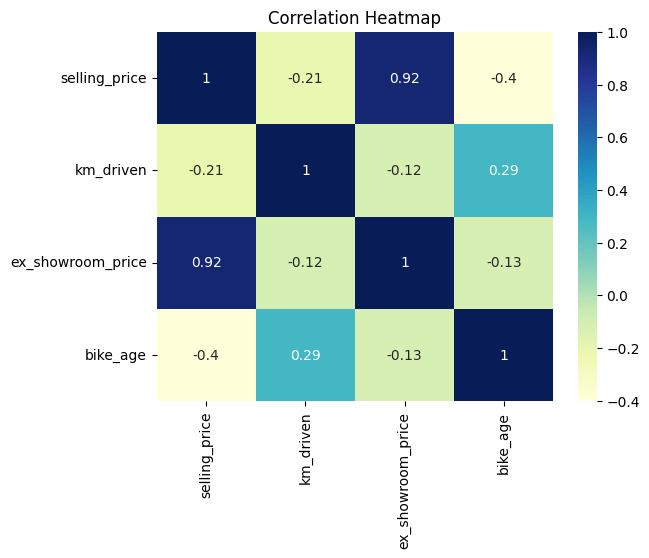

In [17]:
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

#**EDA - 2**

#**About - Dataset:**

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior.

#**Title : Car Sale Dataset**

**Source :**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description :**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

#**Features :**

- **Car_id:** A unique identifier for each car in the dataset, helping to track individual car entries

- **Date:** The date when the car sale transaction took place, formatted as YYYY-MM-DD

- **Customer Name:** The name of the customer who purchased the car, represented as a string

- **Gender:** The gender of the customer, categorized as "Male" or "Female.

- **Annual Income:** The customer's annual income in US dollars, represented as a numeric value

- **Dealer_Name:** The name of the dealership selling the car, represented as a string

- **Company:** The manufacturer or brand name of the car, such as "Toyota," "Ford," etc

- **Model:** The specific model name of the car, such as "Corolla," "Civic," etc

- **Engine:** The engine type of the car, such as "V6," "I4," etc

- **Transmission:** The type of transmission in the car, either "Manual" or "Automatic.

- **Color:** The color of the car, represented as a string (e.g., "Red," "Blue")

- **Price ($):** The selling price of the car in US dollars

- **Dealer_No:** A unique identifier for each car dealer in the dataset

- **Body Style:** The body style of the car, such as "Sedan," "SUV," etc

- **Phone:** The phone number of the customer who purchased the car

- **Dealer_Region:** The geographical region of the car dealer, such as "North," "South," etc.

#**Questions :**

**1. What is the average selling price of cars for each dealer, and how does it compare across different dealers ?**

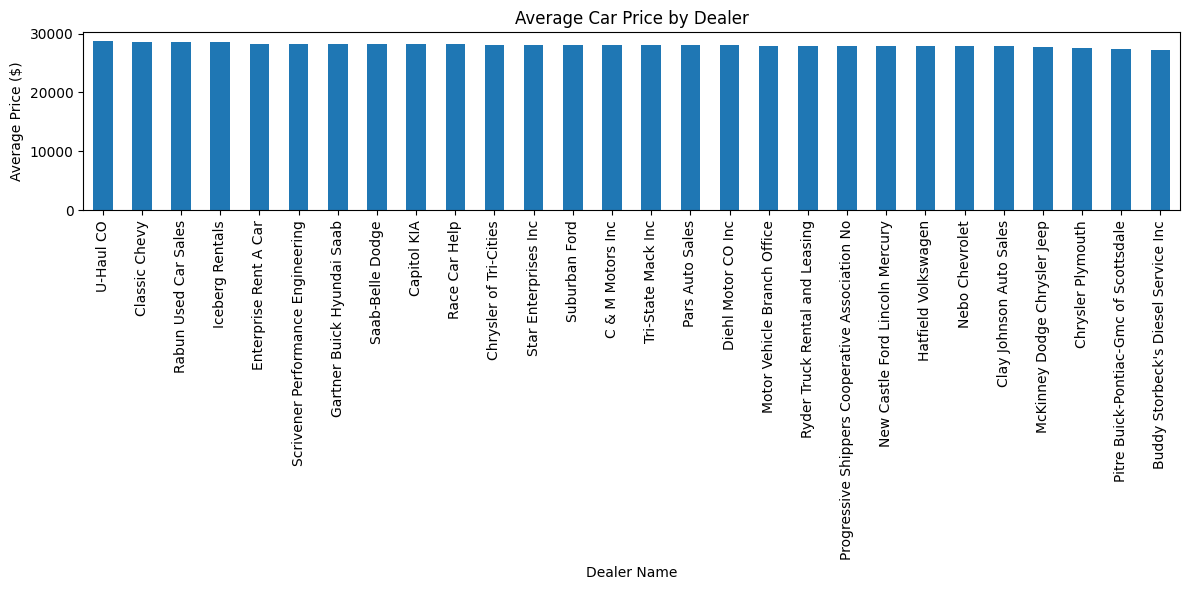

In [34]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Car Sale.csv')

# Group by Dealer_Name and compute average Price
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Plotting
import matplotlib.pyplot as plt

dealer_avg_price.plot(kind='bar', figsize=(12,6), title='Average Car Price by Dealer')
plt.ylabel('Average Price ($)')
plt.xlabel('Dealer Name')
plt.tight_layout()
plt.show()

**2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ?**

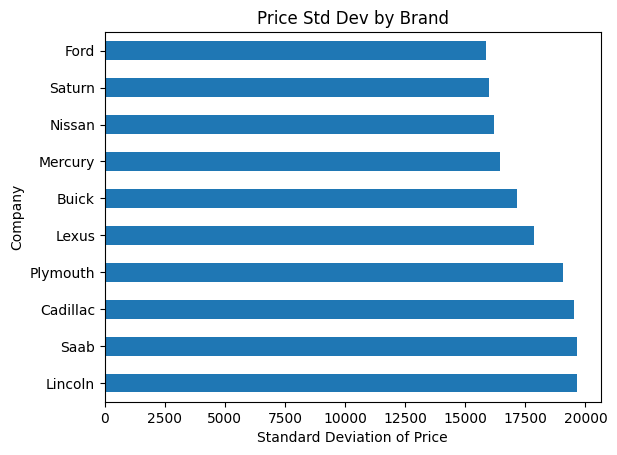

In [21]:
brand_price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Optional: Visualize top 10
brand_price_variation.head(10).plot(kind='barh', title='Price Std Dev by Brand')
plt.xlabel('Standard Deviation of Price')
plt.show()

**3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ?**

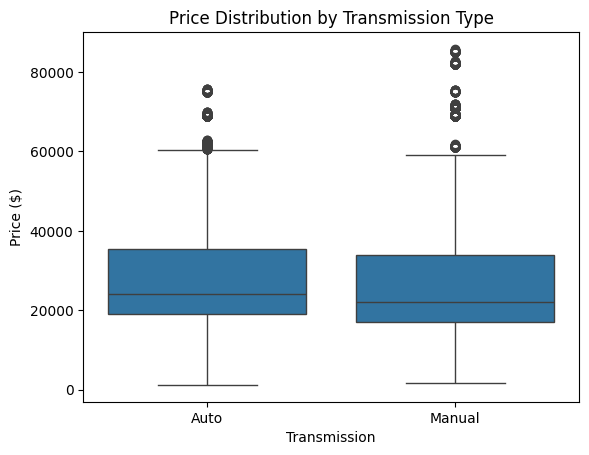

In [22]:
import seaborn as sns

sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

**4. What is the distribution of car prices across different regions ?**

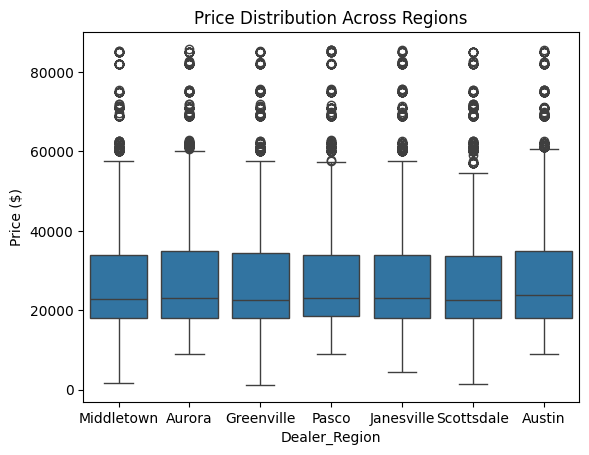

In [23]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution Across Regions')
plt.show()

**5. What is the distribution of cars based on body styles ?**

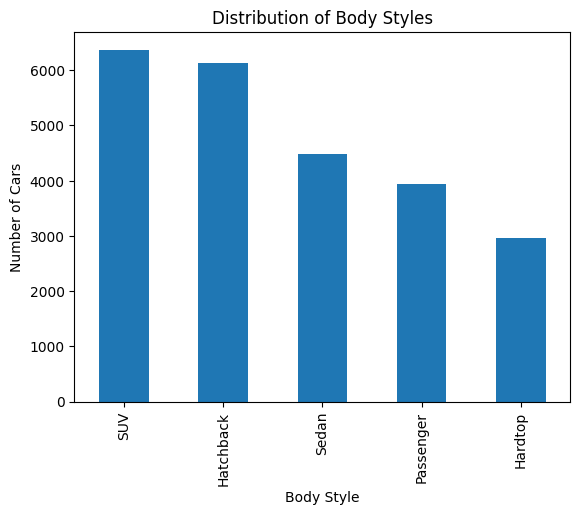

In [24]:
df['Body Style'].value_counts().plot(kind='bar', title='Distribution of Body Styles')
plt.ylabel('Number of Cars')
plt.show()

**6. How does the average selling price of cars vary by customer gender and annual income ?**

<ipython-input-25-3932c5a08b30>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_gender_income = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()


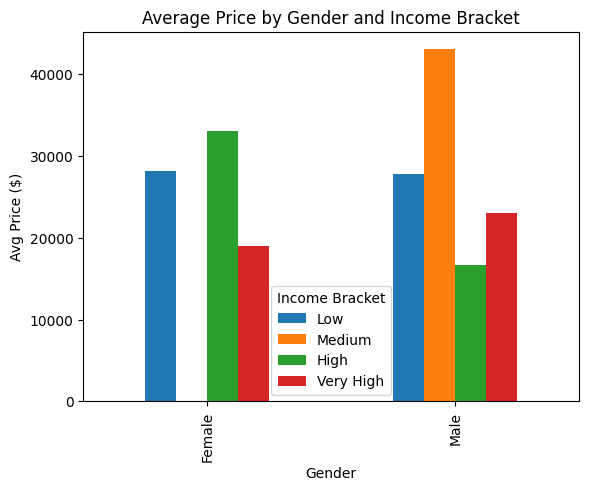

In [25]:
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000],
                              labels=['Low', 'Medium', 'High', 'Very High'])

avg_price_gender_income = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()

avg_price_gender_income.plot(kind='bar')
plt.title('Average Price by Gender and Income Bracket')
plt.ylabel('Avg Price ($)')
plt.show()

**7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?**

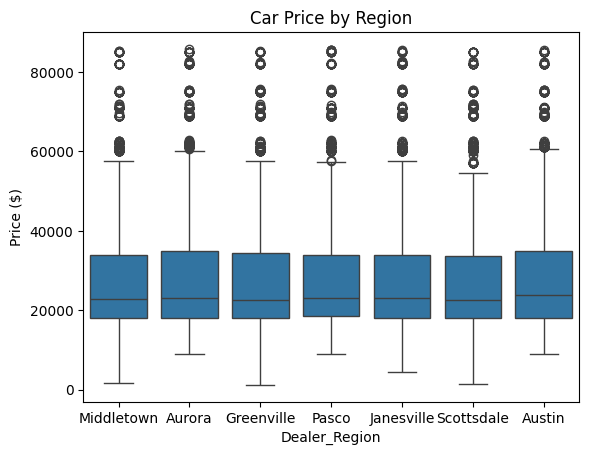

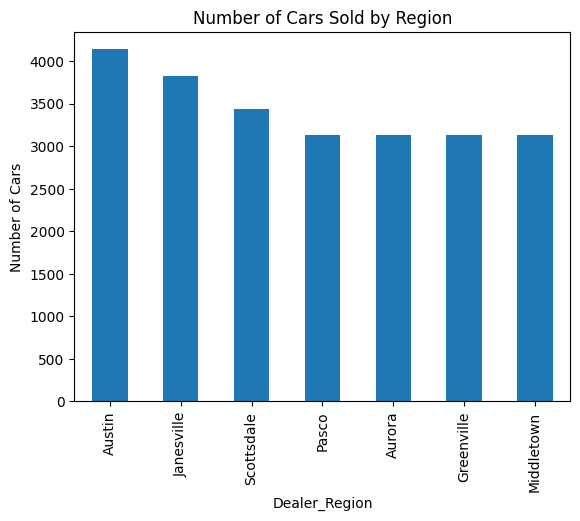

In [26]:
# Price Distribution
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price by Region')
plt.show()

# Number of Cars Sold
df['Dealer_Region'].value_counts().plot(kind='bar', title='Number of Cars Sold by Region')
plt.ylabel('Number of Cars')
plt.show()

**8. How does the average car price differ between cars with different engine sizes ?**

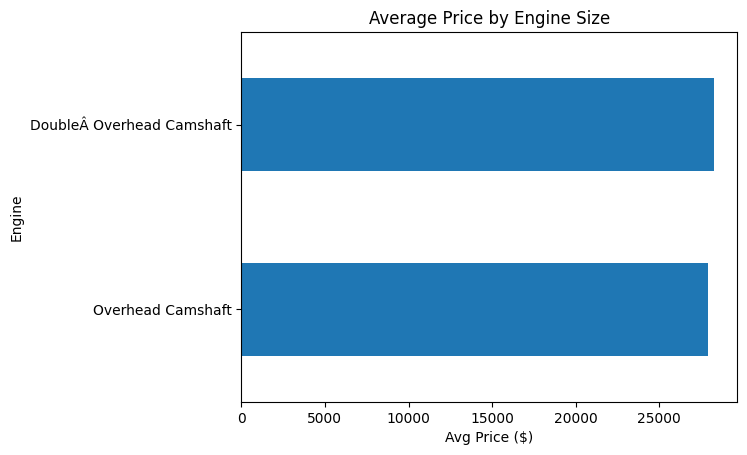

In [27]:
df.groupby('Engine')['Price ($)'].mean().sort_values().plot(kind='barh', title='Average Price by Engine Size')
plt.xlabel('Avg Price ($)')
plt.show()

**9. How do car prices vary based on the customer’s annual income bracket ?**

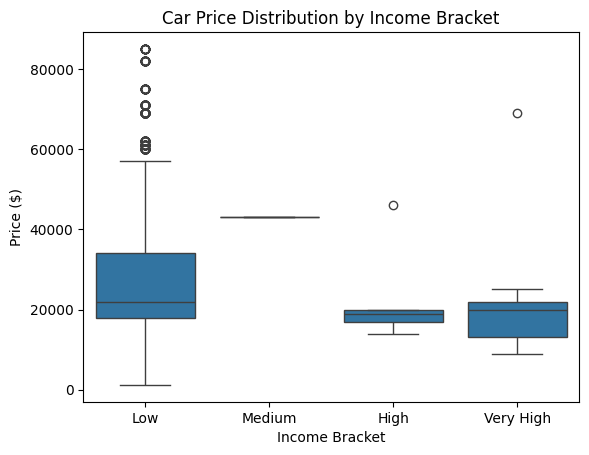

In [28]:
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Income Bracket')
plt.show()

**10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?**

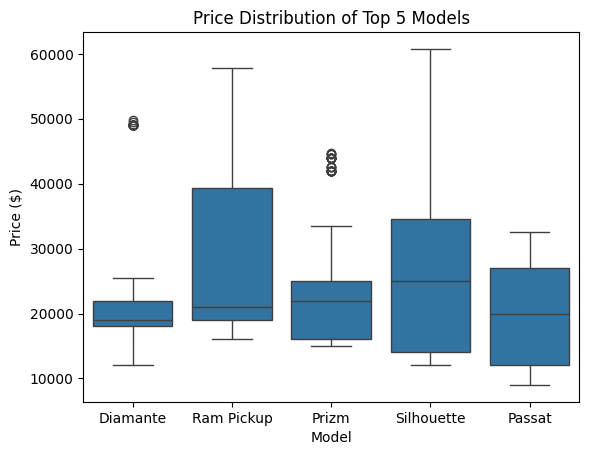

In [29]:
top_models = df['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title('Price Distribution of Top 5 Models')
plt.show()

**11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?**

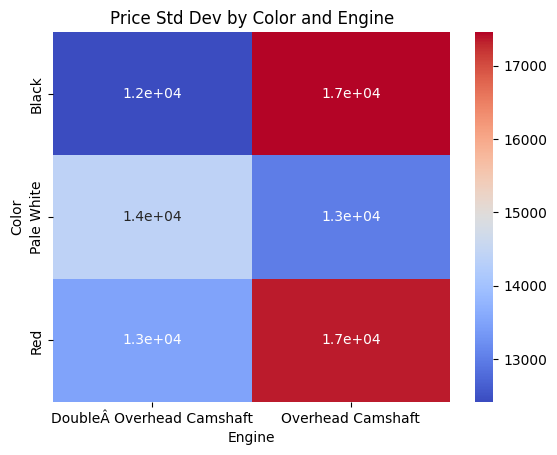

In [35]:
pivot = df.groupby(['Color', 'Engine'])['Price ($)'].std().unstack()

sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title('Price Std Dev by Color and Engine')
plt.show()

**12. Is there any seasonal trend in car sales based on the date of sale ?**

<ipython-input-37-6ad8bc8b8585>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month


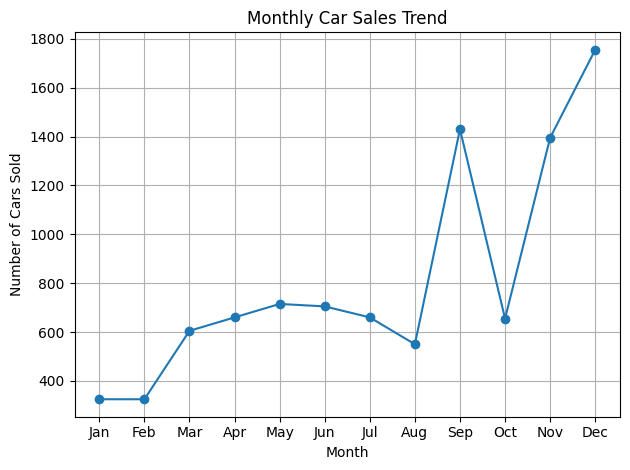

In [37]:
# Step 1: Convert Date column to datetime safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Converts and handles invalid entries

# Step 2: Drop rows where Date could not be parsed (optional)
df = df.dropna(subset=['Date'])

# Step 3: Extract Month from date
df['Month'] = df['Date'].dt.month

# Step 4: Count number of sales per month
monthly_sales = df['Month'].value_counts().sort_index()

# Step 5: Plot
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

**13. How does the car price distribution change when considering different combinations of body style and
transmission type ?**

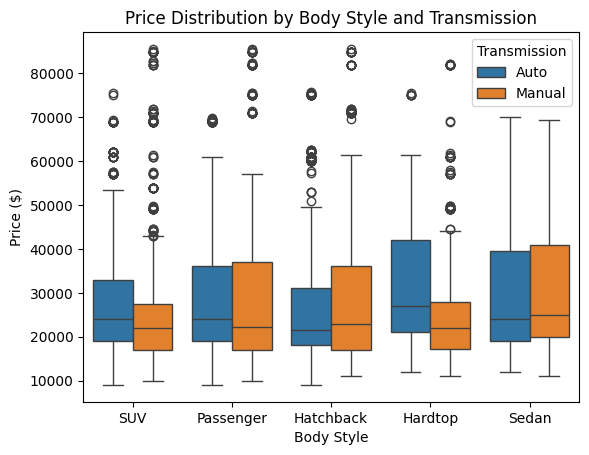

In [38]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission')
plt.show()

**14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact ?**

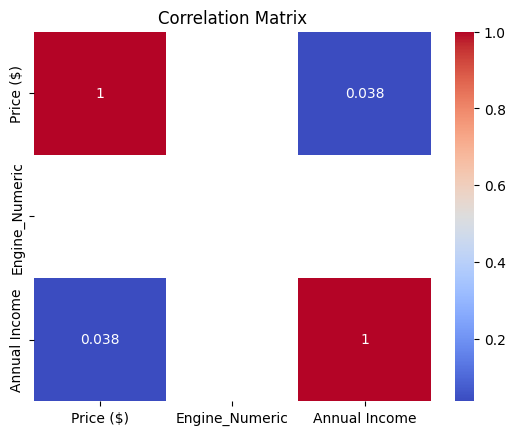

In [39]:
# Convert engine if needed, e.g., "V6" to 6
df['Engine_Numeric'] = df['Engine'].str.extract('(\d+)').astype(float)

# Correlation matrix
corr = df[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**15. How does the average car price vary across different car models and engine types ?**

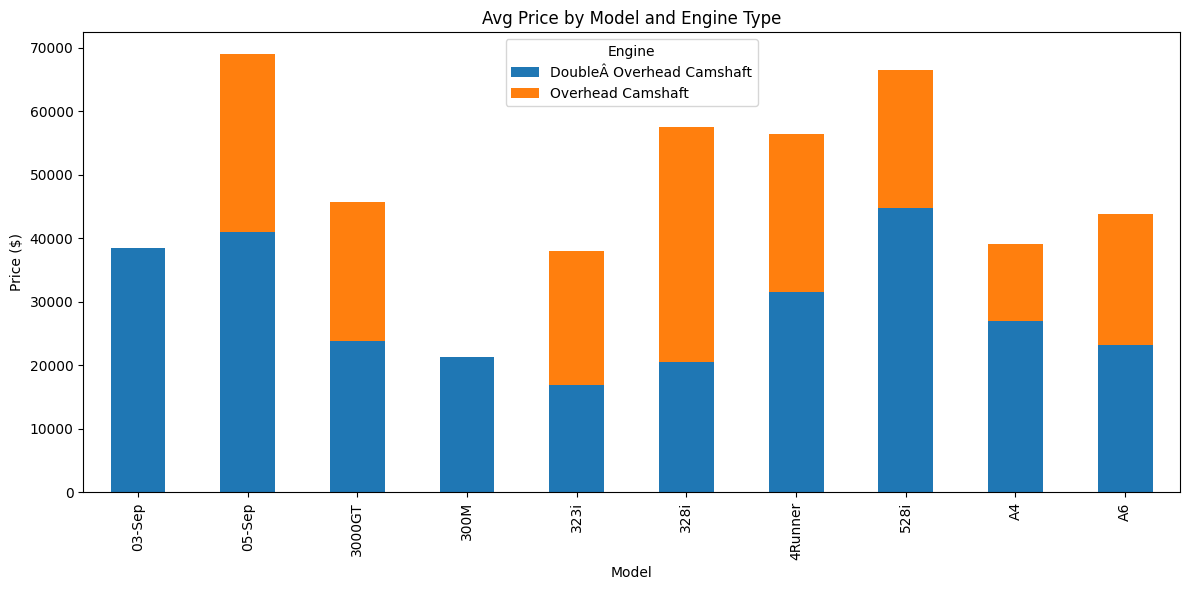

In [40]:
model_engine_avg = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack().fillna(0)
model_engine_avg.head(10).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Avg Price by Model and Engine Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

#**EDA - 3**

#**Amazon Sales Data**


**Description :**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.



#**Features :**

- **product_id:** Unique identifier for each product

- **product_name:** Name of the product

- **category:** Category of the product

- **discounted_price:** Discounted price of the product

- **actual_price:** Actual price of the product

- **discount_percentage:** Percentage of discount for the product

- **rating:** Rating of the product (1-5)

- **rating_count:** Number of people who voted for the Amazon rating

- **about_product:** Description about the product

- **user_id:** ID of the user who wrote the review

- **user_name:** Name of the user who wrote the review

- **review_id:** ID of the user review

- **review_title:** Short review

- **review_content:** Long review

- **img_link:** Image link of the product

- **product_link:** Official website link of the product

#**Questions :**

In [ ]:
# Load the Dataset

import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**1. What is the average rating for each product category ?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

import pandas as pd

# Load the dataset
file_path = 'amazon.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()

# Convert the 'rating' column to numeric, coercing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Optional: Handle potential NaN values created by coercion, e.g., drop rows with NaN in 'rating'
# df.dropna(subset=['rating'], inplace=True)

average_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)
average_ratings

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
...,...
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.6
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5


**2. What are the top rating_count products by category ?**

In [ ]:
top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax()]
top_rated_products[['category', 'product_name', 'rating_count']]

,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


**3. What is the distribution of discounted prices vs. actual prices ?**

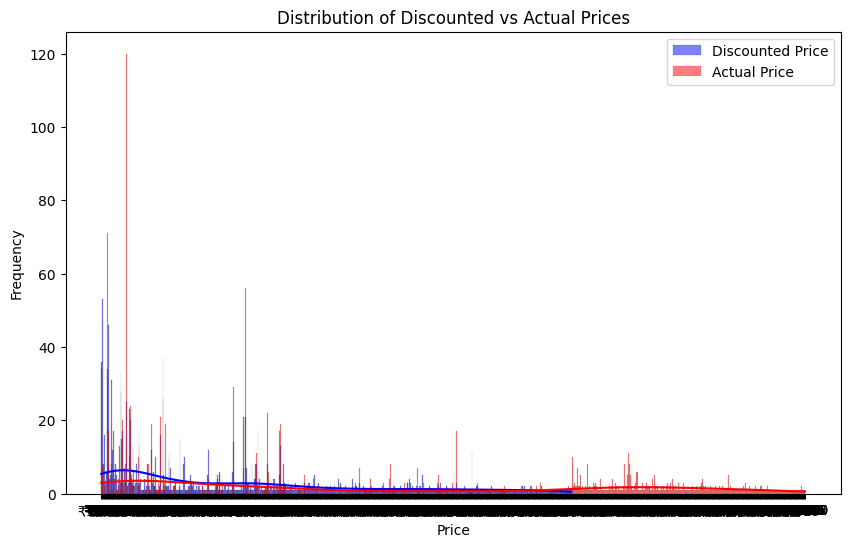

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, bins=30)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Discounted vs Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**4. How does the average discount percentage vary across categories ?**

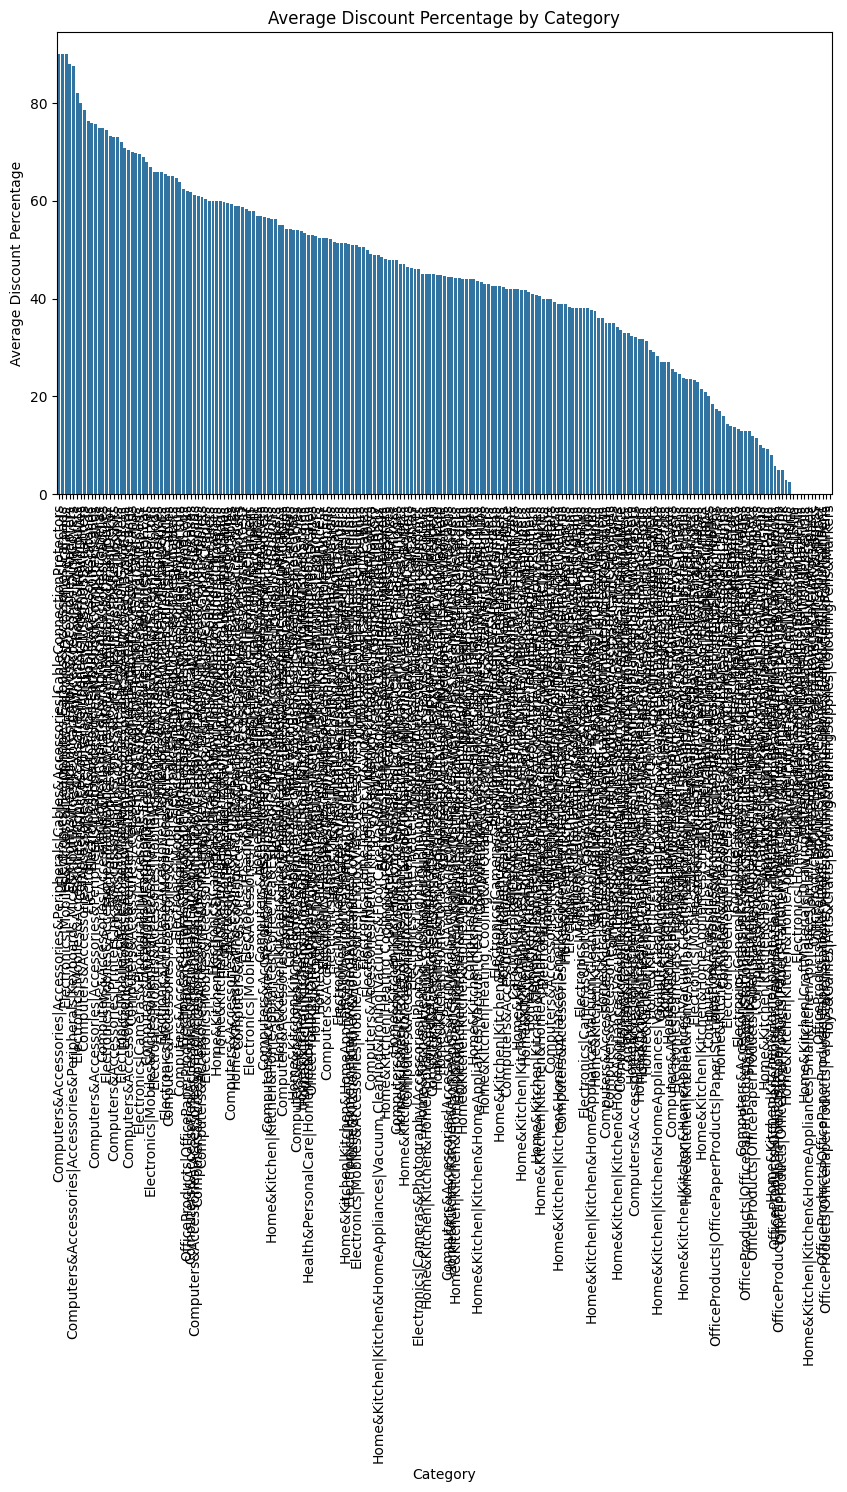

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is already loaded from a previous cell and contains the 'discount_percentage' column

# Clean the 'discount_percentage' column: remove '%' and convert to numeric
# Use errors='coerce' to turn any values that cannot be converted into NaN
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Drop rows where the conversion failed (optional, depending on how you want to handle invalid data)
df.dropna(subset=['discount_percentage'], inplace=True)

# Now calculate the average discount percentage
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_discount.index, y=avg_discount.values)
plt.xticks(rotation=90)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.show()

**5.  What are the most popular product names ?**

In [ ]:
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)
popular_products

,rating_count
product_name,
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",2445.0
"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",1948.0
"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",1806.0
"Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White",1312.0
"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Type C Devices – Red, 1 Meter",1151.0
"SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)",1072.0
"Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)",992.0
Eveready Red 1012 AAA Batteries - Pack of 10,989.0
"Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)",976.0


**6. What are the most popular product keywords ?**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['product_name'].dropna())
keywords = vectorizer.get_feature_names_out()
keywords

array(['10', 'black', 'bluetooth', 'cable', 'charging', 'compatible',
       'data', 'fast', 'hd', 'heater', 'led', 'pro', 'remote', 'smart',
       'tv', 'type', 'usb', 'water', 'white', 'wireless'], dtype=object)

**7. What are the most popular product reviews ?**

In [ ]:
popular_reviews = df['review_title'].value_counts().head(10)
popular_reviews

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"The metal pin is losing it's strength,Sahi h bs 44 rupe ki and dilivery charge 40,Good Charging cable,Good sturdy micro usb cable with good charging speeds,Cheapest micro USB cable in the market,boat is better than this,I bought this for 199rs best charging cable for all mobiles,Good",5
"GOOD,Thank you Amazon very good charging cable,Good,Very good product,good quality,Very Good Product,This is fast charging USB!,Simply perfect at the price of below 100",5


**8. What is the correlation between discounted_price and rating ?**

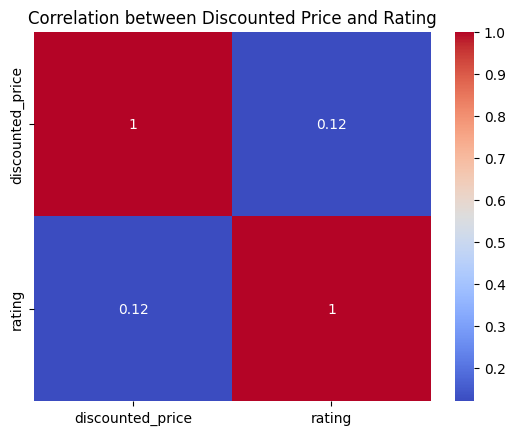

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame is already loaded from the previous cells

# Clean and convert 'discounted_price' and 'actual_price' columns
# Remove the currency symbol '₹' and convert to float
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False)

# Remove any commas if they exist in the price columns
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)
df['actual_price'] = df['actual_price'].str.replace(',', '', regex=False)


# Convert the cleaned columns to numeric (float)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Handle potential missing values introduced by coercion if necessary
# For example, you might fill NaNs with the median or mean, or drop rows
df.dropna(subset=['discounted_price', 'actual_price'], inplace=True)


# Clean and convert 'rating' column to numeric if it's not already
# The traceback didn't explicitly show an error for 'rating', but it's good practice
# to ensure it's numeric if it contains non-numeric entries or is an object type.
# Assuming rating is mostly numeric but might have outliers or non-numeric strings like 'ratings'.
# We might need to inspect the unique values of the 'rating' column if this line also causes errors.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where rating could not be converted to numeric
df.dropna(subset=['rating'], inplace=True)


# Now compute correlation matrix with the cleaned numeric columns
correlation = df[['discounted_price', 'rating']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Discounted Price and Rating')
plt.show()

**9.  What are the Top 5 categories based on the highest rating ?**

In [ ]:
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
top_categories

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


**10.  Identify any potential areas for improvement or optimization based on the data analysis.**

- Based on our analysis, consider the following potential areas for improvement :

 - **Pricing Strategy :** If certain categories have high actual prices but low ratings, it might indicate a mismatch between price and customer satisfaction.

 - **Discount Effectiveness :** Analyze if higher discounts correlate with better ratings or increased sales.

 - **Product Descriptions :** Ensure that products with low ratings have detailed and accurate descriptions to manage customer expectations.

 - **Review Analysis :** Investigate common themes in negative reviews to identify areas for product improvement.

#**EDA - 4**

**Description of the Dataset :**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.


**Application in Data Science :**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors :**


- **Artist:** The name of the artist, providing direct attribution to the creative mind behind the track.

- **Track Name:** The title of the track, encapsulating its identity and essence.

- **Popularity:** A numeric score reflecting the track's reception and appeal among Spotify listeners.

- **Duration (ms):** The track's length in milliseconds, detailing the temporal extent of the musical experience.

- **Track ID:** A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

#**Questions :**

**1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.**

In [ ]:
# Load and Inspect Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")

# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop rows with null values (if any)
df.dropna(inplace=True)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


**2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.**

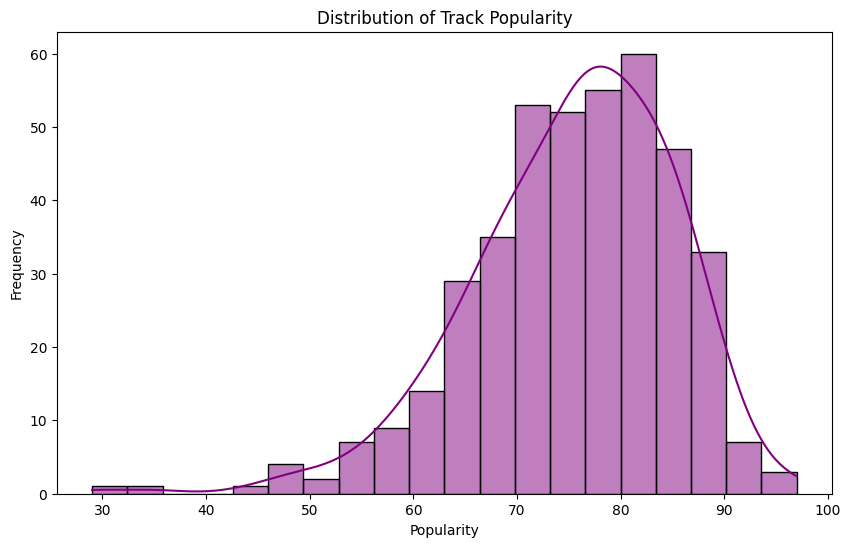

In [ ]:
# Distribution of Popularity

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

**3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**

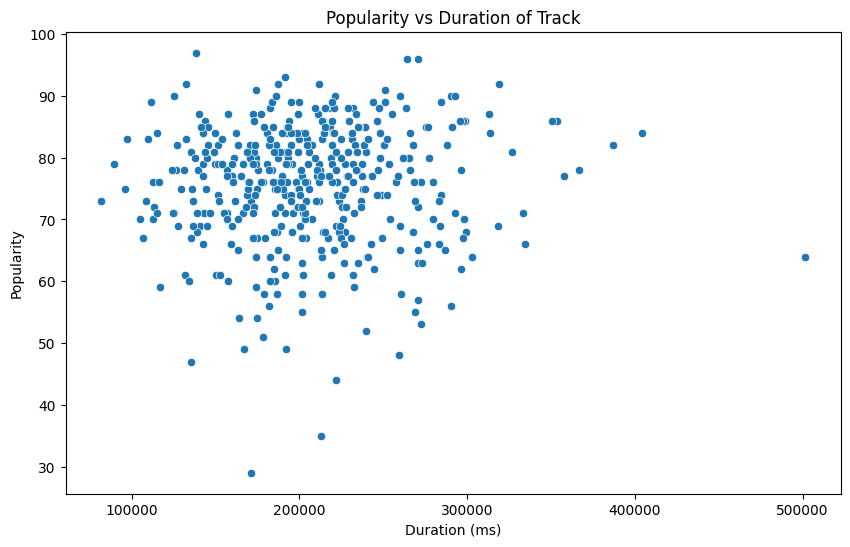

In [ ]:
# Popularity vs Duration

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title('Popularity vs Duration of Track')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

**4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.**

<ipython-input-27-a4b9eafa75a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().head(10).index, palette='magma')


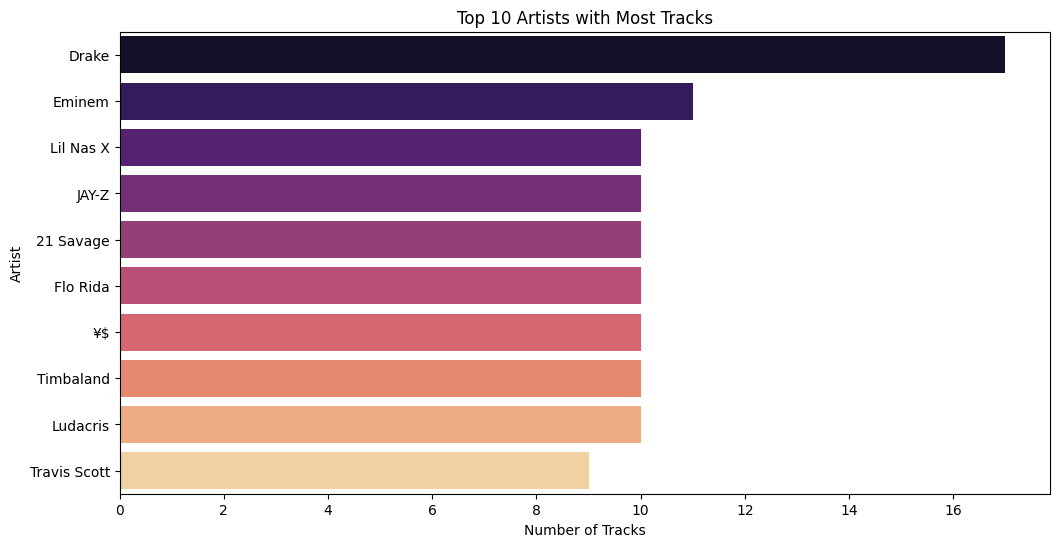

In [ ]:
# Artist with Most Tracks

plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().head(10).index, palette='magma')
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

**5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [ ]:
# Top 5 Least Popular Tracks

least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular)

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


**6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.**

In [ ]:
# Top 5 Artists by Track Count and Avg Popularity

top_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Artists:\n", avg_popularity)

Average Popularity of Top 5 Artists:
 Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


**7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [ ]:
# Most Popular Track for Top 5 Artists

for artist in top_artists:
    top_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).iloc[0]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")

Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem: Without Me (Popularity: 90)
Lil Nas X: THATS WHAT I WANT (Popularity: 81)
JAY-Z: Ni**as In Paris (Popularity: 86)
21 Savage: redrum (Popularity: 96)


**8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

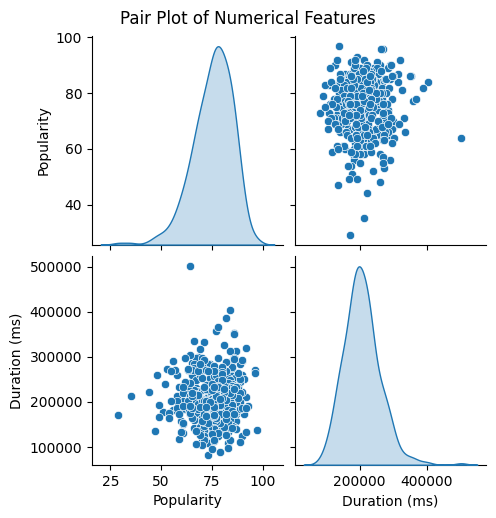

In [ ]:
# Pair Plot

sns.pairplot(df[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

**9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

<ipython-input-32-db2b191c9053>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)', palette='coolwarm')


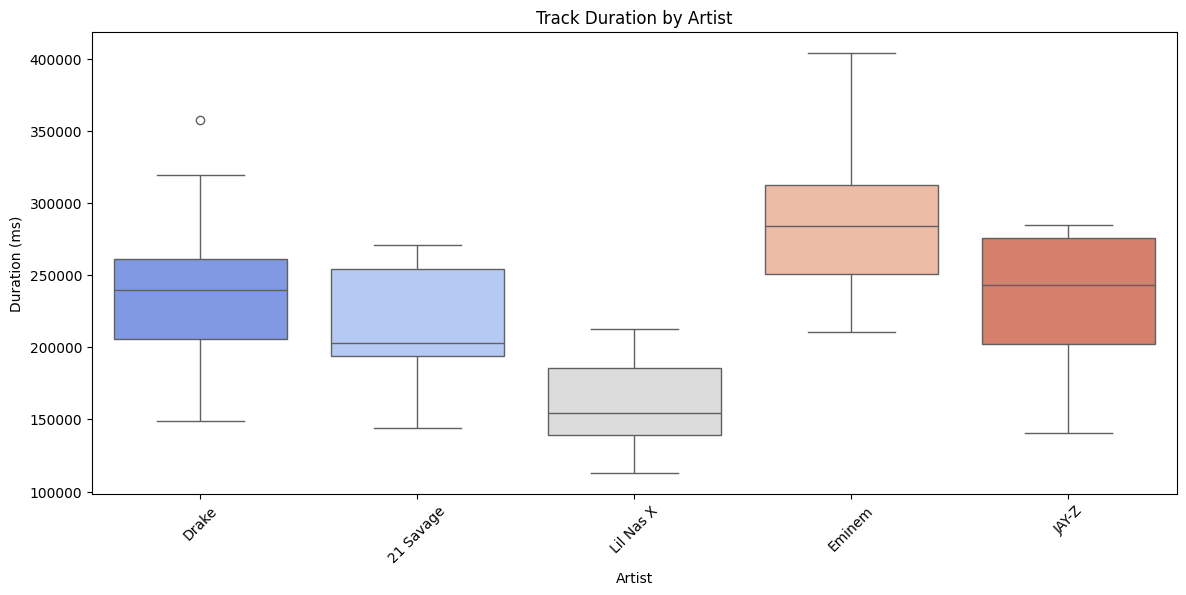

In [ ]:
# Box Plot of Duration by Artist

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)', palette='coolwarm')
plt.title('Track Duration by Artist')
plt.xticks(rotation=45)
plt.show()

**10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

<ipython-input-33-412a4de75c6d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', palette='Spectral')


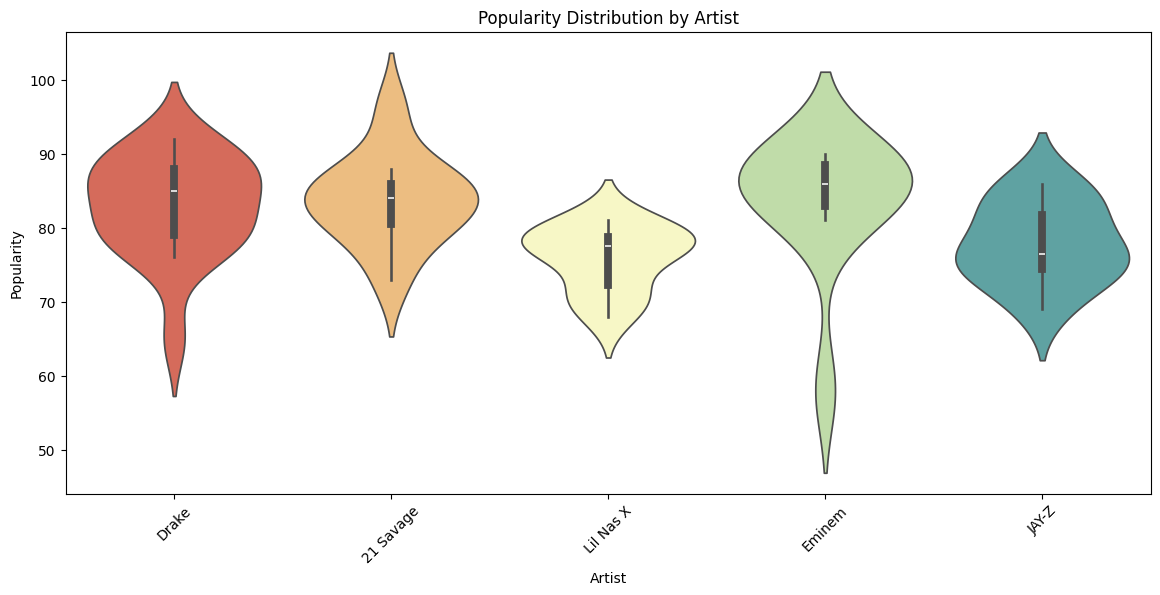

In [ ]:
# Violin Plot of Popularity by Artist

plt.figure(figsize=(14, 6))
sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', palette='Spectral')
plt.title('Popularity Distribution by Artist')
plt.xticks(rotation=45)
plt.show()